# Prediciting Evolutionary Dynamics of Microbial Systems with  Reinforcement Learnin


## Overal View of the Algorithm

![img](RLDFBA.jpg)

### Step 1: Define toy models and the constants and load the toy networks

In [1]:
from cobra import Model, Reaction, Metabolite

"""
A Toy Model is a Cobra Model with the following:

Toy_Model_SA

Reactions(NOT BALANCED):

-> S  Substrate uptake
S + ADP -> S_x + ATP  ATP production from catabolism
ATP -> ADP ATP maintenance
S_x + ATP -> X + ADP  Biomass production
S_x + ATP -> Amylase + ADP  Amylase production
Amylase -> Amylase Exchange
X -> Biomass Out
S_x + ADP -> P + ATP Metabolism stuff!
P ->  Product release

Metabolites:

P  Product
S  Substrate
S_x  Internal metabolite
X  Biomass
ADP  
ATP
Amylase

-----------------------------------------------------------------------


Toy_Model_NE_1:


EX_S_sp1: S -> lowerBound',-10,'upperBound',0
EX_A_sp1: A -> lowerBound',-100,'upperBound',100
EX_B_sp1: B -> lowerBound',-100,'upperBound',100
EX_P_sp1: P->  lowerBound',0,'upperBound',100
R_1_sp1: S  + 2 adp  -> P + 2 atp ,'lowerBound',0,'upperBound',Inf
R_2_sp1: P + atp  -> B  + adp 'lowerBound',0,'upperBound',Inf
R_3_sp1: P + 3 atp  -> A + 3 adp ,'lowerBound',0,'upperBound',Inf
R_4_sp1: 'atp -> adp  lowerBound',0,'upperBound',Inf
OBJ_sp1: 3 A + 3 B + 5 atp  -> 5 adp + biomass_sp1 lowerBound',0,'upperBound',Inf
Biomass_1 biomass_sp1  -> ','lowerBound',0,'upperBound',Inf,'objectiveCoef', 1);





Toy_Model_NE_2:


EX_S_sp1: S -> lowerBound',-10,'upperBound',0
EX_A_sp1: A -> lowerBound',-100,'upperBound',100
EX_B_sp1: B -> lowerBound',-100,'upperBound',100
EX_P_sp1: P->  lowerBound',0,'upperBound',100
R_1_sp1: S  + 2 adp  -> P + 2 atp ,'lowerBound',0,'upperBound',Inf
R_2_sp1: P + atp  -> B  + adp 'lowerBound',0,'upperBound',Inf
R_3_sp1: P + 3 atp  -> A + 3 adp ,'lowerBound',0,'upperBound',Inf
R_4_sp1: 'atp -> adp  lowerBound',0,'upperBound',Inf
OBJ_sp1: 3 A + 3 B + 5 atp  -> 5 adp + biomass_sp1 lowerBound',0,'upperBound',Inf
Biomass_1 biomass_sp1  -> ','lowerBound',0,'upperBound',Inf,'objectiveCoef', 1);

"""
ToyModel_SA = Model('Toy_Model')

### S_Uptake ###

S_Uptake = Reaction('Glc_Ex')
S = Metabolite('Glc', compartment='c')
S_Uptake.add_metabolites({S: -1})
S_Uptake.lower_bound = -10
S_Uptake.upper_bound = 0
ToyModel_SA.add_reaction(S_Uptake)

### ADP Production From Catabolism ###

ATP_Cat = Reaction('ATP_Cat')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
S_x = Metabolite('S_x', compartment='c')
ATP_Cat.add_metabolites({ADP: -1, S: -1, S_x: 1, ATP: 1})
ATP_Cat.lower_bound = 0
ATP_Cat.upper_bound = 1000
ToyModel_SA.add_reaction(ATP_Cat)

### ATP Maintenance ###

ATP_M = Reaction('ATP_M')
ATP_M.add_metabolites({ATP: -1, ADP: 1})
ATP_M.lower_bound = 1
ATP_M.upper_bound = 100
ToyModel_SA.add_reaction(ATP_M)

### Biomass Production ###

X = Metabolite('X', compartment='c')
X_Production = Reaction('X_Production')
X_Production.add_metabolites({S_x: -1, ATP: -10, ADP: 10, X: 0.01})
X_Production.lower_bound = 0
X_Production.upper_bound = 1000
ToyModel_SA.add_reaction(X_Production)

### Biomass Release ###

X_Release = Reaction('X_Ex')
X_Release.add_metabolites({X: -1})
X_Release.lower_bound = 0
X_Release.upper_bound = 1000
ToyModel_SA.add_reaction(X_Release)

### Metabolism stuff ###

P = Metabolite('P', compartment='c')
P_Prod = Reaction('P_Prod')
P_Prod.add_metabolites({S_x: -0.1, ATP: 1, ADP: -1, P: 0.1})
P_Prod.lower_bound = 0
P_Prod.upper_bound = 1000
ToyModel_SA.add_reaction(P_Prod)

### Product Release ###

P_out = Reaction('P_Ex')
P_out.add_metabolites({P: -1})
P_out.lower_bound = 0
P_out.upper_bound = 1000
ToyModel_SA.add_reaction(P_out)
ToyModel_SA.objective = 'X_Ex'

### Amylase Production ###
Amylase_Prod = Reaction('Amylase_Prod')
Amylase = Metabolite('Amylase', compartment='c')
Amylase_Prod.add_metabolites({P: -1, ATP: -20, ADP: 20, Amylase: 1})
Amylase_Prod.lower_bound =0
Amylase_Prod.upper_bound = 1000
ToyModel_SA.add_reaction(Amylase_Prod)

### Amylase Exchange ###
Amylase_Ex = Reaction('Amylase_Ex')
Amylase_Ex.add_metabolites({Amylase: -1})
Amylase_Ex.lower_bound = 0
Amylase_Ex.upper_bound = 1000
ToyModel_SA.add_reaction(Amylase_Ex)

ToyModel_SA.Biomass_Ind=4





### S_Uptake ###
Toy_Model_NE_1 = Model('Toy_1')
                       
EX_S_sp1 = Reaction('EX_S_sp1')
S = Metabolite('S', compartment='c')
EX_S_sp1.add_metabolites({S: -1})
EX_S_sp1.lower_bound = -10
EX_S_sp1.upper_bound = 0
Toy_Model_NE_1.add_reaction(EX_S_sp1)


EX_A_sp1 = Reaction('EX_A_sp1')
A = Metabolite('A', compartment='c')
EX_A_sp1.add_metabolites({A: -1})
EX_A_sp1.lower_bound = -100
EX_A_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_A_sp1)


EX_B_sp1 = Reaction('EX_B_sp1')
B = Metabolite('B', compartment='c')
EX_B_sp1.add_metabolites({B: -1})
EX_B_sp1.lower_bound = -100
EX_B_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_B_sp1)



EX_P_sp1 = Reaction('EX_P_sp1')
P = Metabolite('P', compartment='c')
EX_P_sp1.add_metabolites({P:-1})
EX_P_sp1.lower_bound = 0
EX_P_sp1.upper_bound = 100
Toy_Model_NE_1.add_reaction(EX_P_sp1)


R_1_sp1 = Reaction('R_1_sp1')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp1.add_metabolites({ADP: -2, S: -1, P: 1, ATP: 2})
R_1_sp1.lower_bound = 0
R_1_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_1_sp1)


R_2_sp1 = Reaction('R_2_sp1')
R_2_sp1.add_metabolites({ADP: 1, P: -1, B: 3, ATP: -1})
R_2_sp1.lower_bound = 0
R_2_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_2_sp1)


R_3_sp1 = Reaction('R_3_sp1')
R_3_sp1.add_metabolites({ADP: 3, P: -1, A: 1, ATP: -3})
R_3_sp1.lower_bound = 0
R_3_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_3_sp1)



R_4_sp1 = Reaction('R_4_sp1')
R_4_sp1.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp1.lower_bound = 0
R_4_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(R_4_sp1)




OBJ_sp1 = Reaction("OBJ_sp1")
biomass_sp1 = Metabolite('biomass_sp1', compartment='c')
OBJ_sp1.add_metabolites({ADP:5 ,ATP: -5,biomass_sp1:0.1,A:-1,B:-1})
OBJ_sp1.lower_bound = 0
OBJ_sp1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(OBJ_sp1)

Biomass_1 = Reaction("Biomass_1")
Biomass_1.add_metabolites({biomass_sp1:-1})
Biomass_1.lower_bound = 0
Biomass_1.upper_bound = 1000
Toy_Model_NE_1.add_reaction(Biomass_1)

Toy_Model_NE_1.objective='Biomass_1'
Toy_Model_NE_1.Biomass_Ind=8


### ADP Production From Catabolism ###

Toy_Model_NE_2 = Model('Toy_2')

### S_Uptake ###

EX_S_sp2 = Reaction('EX_S_sp2')
S = Metabolite('S', compartment='c')
EX_S_sp2.add_metabolites({S: -1})
EX_S_sp2.lower_bound = -10
EX_S_sp2.upper_bound = 0
Toy_Model_NE_2.add_reaction(EX_S_sp2)


EX_A_sp2 = Reaction('EX_A_sp2')
A = Metabolite('A', compartment='c')
EX_A_sp2.add_metabolites({A: -1})
EX_A_sp2.lower_bound = -100
EX_A_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_A_sp2)


EX_B_sp2 = Reaction('EX_B_sp2')
B = Metabolite('B', compartment='c')
EX_B_sp2.add_metabolites({B: -1})
EX_B_sp2.lower_bound = -100
EX_B_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_B_sp2)



EX_P_sp2 = Reaction('EX_P_sp2')
P = Metabolite('P', compartment='c')
EX_P_sp2.add_metabolites({P:-1})
EX_P_sp2.lower_bound = 0
EX_P_sp2.upper_bound = 100
Toy_Model_NE_2.add_reaction(EX_P_sp2)


R_1_sp2 = Reaction('R_1_sp2')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp2.add_metabolites({ADP: -2, S: -1, P: 1, ATP: 2})
R_1_sp2.lower_bound = 0
R_1_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_1_sp2)


R_2_sp2 = Reaction('R_2_sp2')
R_2_sp2.add_metabolites({ADP: 3, P: -1, B: 1, ATP: -3})
R_2_sp2.lower_bound = 0
R_2_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_2_sp2)


R_3_sp2 = Reaction('R_3_sp2')
R_3_sp2.add_metabolites({ADP: 1, P: -1, A: 3, ATP: -1})
R_3_sp2.lower_bound = 0
R_3_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_3_sp2)



R_4_sp2 = Reaction('R_4_sp2')
R_4_sp2.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp2.lower_bound = 0
R_4_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(R_4_sp2)




OBJ_sp2 = Reaction("OBJ_sp2")
biomass_sp2 = Metabolite('biomass_sp2', compartment='c')
OBJ_sp2.add_metabolites({ADP:5 ,ATP: -5,biomass_sp2:0.1,A:-1,B:-1})
OBJ_sp2.lower_bound = 0
OBJ_sp2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(OBJ_sp2)

Biomass_2 = Reaction("Biomass_2")
Biomass_2.add_metabolites({biomass_sp2:-1})
Biomass_2.lower_bound = 0
Biomass_2.upper_bound = 1000
Toy_Model_NE_2.add_reaction(Biomass_2)
Toy_Model_NE_2.objective="Biomass_2"
Toy_Model_NE_2.Biomass_Ind=8




if __name__ == '__main__':
    print(ToyModel_SA.optimize().fluxes)
    print(ToyModel_SA.exchanges)
    print(ToyModel_SA.optimize().status)
    print(Toy_Model_NE_1.optimize().fluxes)
    print(Toy_Model_NE_1.exchanges)
    print(Toy_Model_NE_2.optimize().fluxes)
    print(Toy_Model_NE_2.exchanges)

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Glc_Ex         -10.0000
ATP_Cat         10.0000
ATP_M            1.0000
X_Production     5.4500
X_Ex             0.0545
P_Prod          45.5000
P_Ex             4.5500
Amylase_Prod     0.0000
Amylase_Ex       0.0000
Name: fluxes, dtype: float64
[<Reaction Glc_Ex at 0x105799850>, <Reaction X_Ex at 0x1477d5eb0>, <Reaction P_Ex at 0x166020670>, <Reaction Amylase_Ex at 0x166020280>]
optimal
EX_S_sp1    -10.0
EX_A_sp1     -4.0
EX_B_sp1     -4.0
EX_P_sp1     10.0
R_1_sp1      10.0
R_2_sp1       0.0
R_3_sp1       0.0
R_4_sp1       0.0
OBJ_sp1       4.0
Biomass_1     0.4
Name: fluxes, dtype: float64
[<Reaction EX_S_sp1 at 0x166020fd0>, <Reaction EX_A_sp1 at 0x1660285b0>, <Reaction EX_B_sp1 at 0x166028790>, <Reaction EX_P_sp1 at 0x1660289a0>, <Reaction Biomass_1 at 0x166030dc0>]
EX_S_sp2    -10.0
EX_A_sp2     -4.0
EX_B_sp2     -4.0
EX_P_sp2     10.0
R_1_sp2      10.0
R_2_sp2      

In [8]:
from asyncore import write
from cmath import inf
from dataclasses import dataclass,field
import datetime
from tkinter import HIDDEN
from xmlrpc.client import DateTime
import numpy as np
import cobra
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import pickle
import pandas
#import cplex
from ToyModel import  Toy_Model_NE_1,Toy_Model_NE_2
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple,deque
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import warnings
import torch.autograd
from torch.autograd import Variable
import gym
from tensorboardX import SummaryWriter
warnings.filterwarnings("ignore")
Scaler=StandardScaler()
HIDDEN_SIZE=20
NUMBER_OF_BATCHES=300
Main_dir = os.path.dirname(".")


### Then we have to define a number of classes, objects, and functions that will be used during the simulations!

In [9]:


Episode = namedtuple('Episode', field_names=['reward', 'steps'])
EpisodeStep = namedtuple('EpisodeStep', field_names=['observation', 'action'])

        
class Memory:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state):
        experience = (state, action, np.array([reward]), next_state)
        self.buffer.appendleft(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            
        
        return state_batch, action_batch, reward_batch, next_state_batch

    def __len__(self):
        return len(self.buffer)



class DDPGActor(nn.Module):

    def __init__(self, obs_size, act_size):
        super(DDPGActor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 30),
            nn.Linear(30, 30),
            nn.Linear(30, 30),
            nn.Linear(30, act_size),
            nn.Tanh() )

    def forward(self, x):
       return self.net(x)

class DDPGCritic(nn.Module):       
    
    def __init__(self, obs_size, act_size):

        super(DDPGCritic, self).__init__()
        self.obs_net = nn.Sequential(
            nn.Linear(obs_size, 40),
            nn.Linear(40, 40),
            nn.Linear(40, 40),
            nn.Linear(40, 40)
            
            )


        self.out_net = nn.Sequential(
                       nn.Linear(40 + act_size, 30),
                       nn.Linear(30, 30),
                       nn.Linear(30, 30),
                       nn.Linear(30, 1)
                       )
    
    def forward(self, x, a):
        obs = self.obs_net(x)           
        return self.out_net(torch.cat([obs, a],dim=1))


### Definition of DFBA function

In [10]:
def dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################
    for m in Models:
        m.episode_reward=0
        m.episode_steps=[]

    
    sol, t = odeFwdEuler(ODE_System, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    for m in Models:
        m.Episode=Episode(reward=m.episode_reward, steps=m.episode_steps)




    return [m.Episode for m in Models]


def ODE_System(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        M.a=M.policy(torch.FloatTensor([C[M.observables]/Params["Env_States_Initial_MAX"]])).detach().numpy()[0]
        if random.random()<M.epsilon:
            
            # M.a=M.policy(torch.FloatTensor([C[M.observables]])).detach().numpy()[0]
            # M.rand_act=np.random.uniform(low=-(M.a+1), high=1-M.a,size=len(M.actions)).copy()
            # M.a+=M.rand_act
            # M.a+=np.random.uniform(low=-(1+M.a), high=1-M.a,size=len(M.actions))/5
            M.a=np.random.uniform(low=-1, high=1,size=len(M.actions))

        else:
            pass
        
        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=10
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):

            if M.a[index]<0:
            
                M.reactions[M.actions[index]].lower_bound=M.a[index]*abs(M.reactions[M.actions[index]].lower_bound)

            else:

                M.reactions[M.actions[index]].lower_bound=M.a[index]*M.reactions[M.actions[index]].upper_bound

            

        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            Models[i].reward= 0
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value



    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i] = 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                                    [i, j]]*C[j]
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    Next_C=C+dCdt*dt
    for m in Models:
        m.buffer.push(torch.FloatTensor([C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0],m.a,m.reward,torch.FloatTensor([Next_C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0])
        if Counter>0 and Counter%m.update_batch==0:
            # TD_Error=[]
            S,A,R,Sp=m.buffer.sample(200)
            Qvals = m.value(torch.FloatTensor(S), torch.FloatTensor(A))
            next_actions = m.policy(torch.FloatTensor(Sp))
            next_Q = m.value_target.forward(torch.FloatTensor(Sp), next_actions.detach())
            Qprime = torch.FloatTensor(R) + next_Q
            critic_loss=m.Net_Obj(Qvals,Qprime)
            policy_loss = -m.value(torch.FloatTensor(S), m.policy(torch.FloatTensor(S))).mean()
            
            
            m.optimizer_policy.zero_grad()
            policy_loss.backward()
            m.optimizer_policy.step()

            m.optimizer_value.zero_grad()
            critic_loss.backward() 
            m.optimizer_value.step()
            

            for target_param, param in zip(m.policy_target.parameters(), m.policy.parameters()):
                target_param.data.copy_(param.data * m.tau + target_param.data * (1.0 - m.tau))
       
            for target_param, param in zip(m.value_target.parameters(), m.value.parameters()):
                target_param.data.copy_(param.data * m.tau + target_param.data * (1.0 - m.tau))
        
        
        
        
        
        
        
        
        
        
        
        m.episode_reward+=m.reward

    
    
    return dCdt

### Now we need some utility functions!

In [11]:
def Build_Mapping_Matrix(Models):
    """
    Given a list of COBRA model objects, this function will build a mapping matrix

    """

    Ex_sp = []
    Temp_Map={}
    for model in Models:
        
        
        if not hasattr(model,"Biomass_Ind"):
            raise Exception("Models must have 'Biomass_Ind' attribute in order for the DFBA to work properly!")
        
        
        for Ex_rxn in model.exchanges :
            if Ex_rxn!=model.reactions[model.Biomass_Ind]:
                if list(Ex_rxn.metabolites.keys())[0].id not in Ex_sp:
                    Ex_sp.append(list(Ex_rxn.metabolites.keys())[0].id)
                if list(Ex_rxn.metabolites.keys())[0].id in Temp_Map.keys():
                   Temp_Map[list(Ex_rxn.metabolites.keys())[0].id][model]=Ex_rxn
                else:
                     Temp_Map[list(Ex_rxn.metabolites.keys())[0].id]={model:Ex_rxn}

    Mapping_Matrix = np.zeros((len(Ex_sp), len(Models)), dtype=int)
    for i, id in enumerate(Ex_sp):
        for j, model in enumerate(Models):
            if model in Temp_Map[id].keys():
                Mapping_Matrix[i, j] = model.reactions.index(Temp_Map[id][model].id)
            else:
                Mapping_Matrix[i, j] = -1
    return {"Ex_sp": Ex_sp, "Mapping_Matrix": Mapping_Matrix}






def Starch_Degradation_Kinetics(a_Amylase: float, Starch: float, Model="", k: float = 1):
    """
    This function calculates the rate of degradation of starch
    a_Amylase Unit: mmol
    Starch Unit: mg

    """

    return a_Amylase*Starch*k/(Starch+10)


def Glucose_Uptake_Kinetics(Glucose: float, Model=""):
    """
    This function calculates the rate of glucose uptake
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Glucose Unit: mmol

    """
    return 20*(Glucose/(Glucose+20))


def General_Uptake_Kinetics(Compound: float, Model=""):
    """
    This function calculates the rate of uptake of a compound in the reactor
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Compound Unit: mmol

    """
    return 20*(Compound/(Compound+20))





def odeFwdEuler(ODE_Function, ICs, dt, Params, t_span, Models, Mapping_Dict):
    Integrator_Counter = 0
    t = np.arange(t_span[0], t_span[1], dt)
    sol = np.zeros((len(t), len(ICs)))
    sol[0] = ICs
    for i in range(1, len(t)):
        sol[i] = sol[i-1] + \
            ODE_Function(sol[i-1], t[i-1], Models, Mapping_Dict,
                         Params, dt,Integrator_Counter)*dt
        Integrator_Counter += 1
    return sol, t


def Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer,t_span=[0, 100], dt=0.1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]

    
    for BATCH in range(NUMBER_OF_BATCHES):
        for model in Models:
            model.epsilon=0.01+0.99/(np.exp(BATCH/20))
            model.tau=0.001+0.5/(np.exp(BATCH/20))
        dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
    
        for mod in Models:
            print(f"{BATCH} - {mod.NAME} earned {mod.episode_reward} during this episode!")
            writer.add_scalar(f"{mod.NAME} reward_mean", mod.episode_reward, BATCH)
    





def Flux_Clipper(Min,Number,Max):
    return(min(max(Min,Number),Max))

### We now define the high level main function that controls every part of the code

In [12]:
def main(Models: list = [Toy_Model_NE_1.copy(), Toy_Model_NE_2.copy()], max_time: int = 100, Dil_Rate: float = 0.000000001, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """
    # Adding Agents info ###-----------------------------------------------------

    # State dimensions in this RLDFBA variant include: [Agent1,...,Agentn, glucose,starch]
    for i in range(len(Models)):
        if not hasattr(Models[i], "_name"):
            Models[i].NAME = "Agent_" + str(i)
            print(f"Agent {i} has been given a defult name")
        Models[i].solver.objective.name = "_pfba_objective"
    # -------------------------------------------------------------------------------

    # Mapping internal reactions to external reactions, and operational parameter
    # setup ###-------------------------------------------------------------------

    # For more information about the structure of the ODEs,see ODE_System function
    # or the documentation.

    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.ones((len(Models)+len(Mapping_Dict["Ex_sp"]),))
    Inlet_C = np.zeros((len(Models)+len(Mapping_Dict["Ex_sp"]),))

    #Parameters that are use inside DFBA

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Inlet_C": Inlet_C,
        "Agents_Index": [i for i in range(len(Models))],
    }

    #Define Agent attributes
    Obs=[i for i in range(len(Models))]
    Obs.extend([Mapping_Dict["Ex_sp"].index(sp)+len(Models) for sp in Mapping_Dict["Ex_sp"] if sp!='P' ])
    for ind,m in enumerate(Models):
        m.observables=Obs
        m.actions=(Mapping_Dict["Mapping_Matrix"][Mapping_Dict["Ex_sp"].index("A"),ind],Mapping_Dict["Mapping_Matrix"][Mapping_Dict["Ex_sp"].index("B"),ind])
        m.policy=DDPGActor(len(m.observables),len(m.actions))
        m.policy_target=DDPGActor(len(m.observables),len(m.actions))
        m.value=DDPGCritic(len(m.observables),len(m.actions))
        m.value_target=DDPGCritic(len(m.observables),len(m.actions))
        m.R=0
        m.tau=0.005
        m.optimizer_policy=optim.Adam(params=m.policy.parameters(), lr=0.001)
        m.optimizer_policy_target=optim.SGD(params=m.policy.parameters(), lr=0.01)
        m.optimizer_value=optim.Adam(params=m.value.parameters(), lr=0.001)
        m.optimizer_value_target=optim.SGD(params=m.value.parameters(), lr=0.01)
        m.Net_Obj=nn.MSELoss()
        m.buffer=Memory(100000)
        m.alpha=0.01
        m.update_batch=500
        m.gamma=0.95
        
    ### I Assume that the environment states are all observable. Env states will be stochastic
    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.1,0.1+0.00000001],[0.1,0.1+0.00000001],[100,100+0.00001],[0.0000000001,0.00000001+0.00000000001],[0.00000001,0.00000001+0.00000000001]]
    Params["Env_States_Initial_MAX"]=np.array([1,1,100,10,10])
    for i in range(len(Models)):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA_NECOM")
    Outer_Counter = 0
    

    Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer)
    
    Time=datetime.datetime.now().strftime("%d_%m_%Y.%H_%M_%S")
    Results_Dir=os.path.join(Main_dir,"Outputs",str(Time))
    os.mkdir(Results_Dir)
    with open(os.path.join(Results_Dir,"Models.pkl"),'wb') as f:
        pickle.dump(Models,f)
    return Models



### Finally it's time to run!!!

## Case 1: Auxotrophy

In [13]:
Toy_Model_NE_1_A=Toy_Model_NE_1.copy()
Toy_Model_NE_2_A=Toy_Model_NE_2.copy()
Toy_Model_NE_1_A.remove_reactions('R_3_sp1')
Toy_Model_NE_1_A.Biomass_Ind=8
Toy_Model_NE_2_A.remove_reactions('R_2_sp2')
Toy_Model_NE_2_A.Biomass_Ind=8
Models_Auxotrophy=[Toy_Model_NE_1_A,Toy_Model_NE_2_A]

In [14]:

Models_A=main(Models_Auxotrophy)

Agent 0 has been given a defult name
Agent 1 has been given a defult name
0 - Agent_0 earned 54.16598289517398 during this episode!
0 - Agent_1 earned 60.64619572374876 during this episode!
1 - Agent_0 earned 47.438226423694694 during this episode!
1 - Agent_1 earned 55.48083624017159 during this episode!
2 - Agent_0 earned 54.22814618589132 during this episode!
2 - Agent_1 earned 60.21943058670675 during this episode!
3 - Agent_0 earned 52.23132105970012 during this episode!
3 - Agent_1 earned 52.2196868625277 during this episode!
4 - Agent_0 earned 54.204680655549716 during this episode!
4 - Agent_1 earned 53.15401653643336 during this episode!
5 - Agent_0 earned 36.07078478513605 during this episode!
5 - Agent_1 earned 36.45723889257013 during this episode!
6 - Agent_0 earned 48.43595251710351 during this episode!
6 - Agent_1 earned 43.90781226362094 during this episode!
7 - Agent_0 earned 48.27430103787565 during this episode!
7 - Agent_1 earned 38.77877035941749 during this episod

69 - Agent_0 earned 2.908196976819641 during this episode!
69 - Agent_1 earned 3.107469567995638 during this episode!
70 - Agent_0 earned 1.940470035228348 during this episode!
70 - Agent_1 earned 6.096721195429983 during this episode!
71 - Agent_0 earned 2.271188800753452 during this episode!
71 - Agent_1 earned 2.9783072063208222 during this episode!
72 - Agent_0 earned 4.55813455364558 during this episode!
72 - Agent_1 earned 3.520663485480031 during this episode!
73 - Agent_0 earned 2.481141343567253 during this episode!
73 - Agent_1 earned 2.879485878981729 during this episode!
74 - Agent_0 earned 1.5034511595672655 during this episode!
74 - Agent_1 earned 0.6621659163523125 during this episode!
75 - Agent_0 earned 2.5885733063479064 during this episode!
75 - Agent_1 earned 4.68811448147755 during this episode!
76 - Agent_0 earned 2.5386824176041287 during this episode!
76 - Agent_1 earned 2.915985480335507 during this episode!
77 - Agent_0 earned 2.3499701926086565 during this ep

137 - Agent_0 earned 22.237816742204718 during this episode!
137 - Agent_1 earned 2.0610276424058465 during this episode!
138 - Agent_0 earned 23.562562892073522 during this episode!
138 - Agent_1 earned 7.286805396721698 during this episode!
139 - Agent_0 earned 25.057215053397396 during this episode!
139 - Agent_1 earned 7.567791280991816 during this episode!
140 - Agent_0 earned 27.116617508443838 during this episode!
140 - Agent_1 earned 31.439260340070266 during this episode!
141 - Agent_0 earned 35.43490053284092 during this episode!
141 - Agent_1 earned 14.374907230900886 during this episode!
142 - Agent_0 earned 23.979070215694804 during this episode!
142 - Agent_1 earned 33.571214633197734 during this episode!
143 - Agent_0 earned 23.443379951831783 during this episode!
143 - Agent_1 earned 30.255171261318758 during this episode!
144 - Agent_0 earned 25.432238168482726 during this episode!
144 - Agent_1 earned 34.7247252502504 during this episode!
145 - Agent_0 earned 26.39871

205 - Agent_0 earned 28.80782867107361 during this episode!
205 - Agent_1 earned 28.57400063902089 during this episode!
206 - Agent_0 earned 28.863063584645705 during this episode!
206 - Agent_1 earned 28.698056496008988 during this episode!
207 - Agent_0 earned 29.294431144409913 during this episode!
207 - Agent_1 earned 28.920532193463355 during this episode!
208 - Agent_0 earned 28.673240107515287 during this episode!
208 - Agent_1 earned 28.957376539016863 during this episode!
209 - Agent_0 earned 28.86665194186588 during this episode!
209 - Agent_1 earned 28.773500811434808 during this episode!
210 - Agent_0 earned 29.19137813208699 during this episode!
210 - Agent_1 earned 28.856306711538988 during this episode!
211 - Agent_0 earned 28.965746985321637 during this episode!
211 - Agent_1 earned 28.711498601342658 during this episode!
212 - Agent_0 earned 28.657638695476383 during this episode!
212 - Agent_1 earned 28.64110774037749 during this episode!
213 - Agent_0 earned 28.92063

273 - Agent_0 earned 28.79461140162718 during this episode!
273 - Agent_1 earned 28.62830492635421 during this episode!
274 - Agent_0 earned 28.712472637216756 during this episode!
274 - Agent_1 earned 28.608108006289907 during this episode!
275 - Agent_0 earned 28.700970845816745 during this episode!
275 - Agent_1 earned 28.914113333129368 during this episode!
276 - Agent_0 earned 28.62503503499868 during this episode!
276 - Agent_1 earned 28.813966781148352 during this episode!
277 - Agent_0 earned 28.871902273332353 during this episode!
277 - Agent_1 earned 28.56416705700492 during this episode!
278 - Agent_0 earned 28.837127467488912 during this episode!
278 - Agent_1 earned 28.88661606347241 during this episode!
279 - Agent_0 earned 28.66442208598991 during this episode!
279 - Agent_1 earned 29.165295131952323 during this episode!
280 - Agent_0 earned 29.013805332324672 during this episode!
280 - Agent_1 earned 28.694188333117424 during this episode!
281 - Agent_0 earned 28.859484

## If you want to load a pretrained model

1- Auxotrophy

In [8]:
with open(os.path.join("Outputs","31_08_2022.08_06_29","Models.pkl"),'rb') as f:
        Models_A=pickle.load(f)

## Step n: Plotting the policy

Observation space of each agent **in this particular example** is similar and contains 5 different states. Our goal is to create a meshgrid dataframe that includes these states and the actions taken as columns 

In [9]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
Space_Size=1000
Space=np.random.uniform(low=[0,0,0,0,0],high=[1,1,1,1,1],size=(Space_Size,5))
Actions_1=Models_A[0].policy(torch.FloatTensor(Space))
Actions_2=Models_A[1].policy(torch.FloatTensor(Space))
DF_1_A=pd.DataFrame(np.hstack((Space,Actions_1.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])
DF_2_A=pd.DataFrame(np.hstack((Space,Actions_2.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])


## Agent 1 Policy 

<AxesSubplot:>

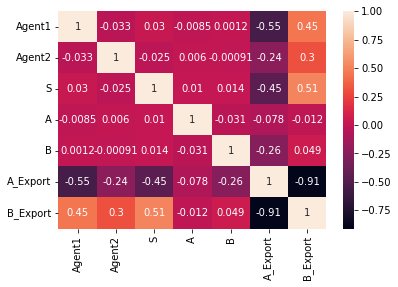

In [20]:
sns.heatmap(DF_1_A.corr(),annot=True,)

In [23]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1_A["S"], y=DF_1_A["B"],z=DF_1_A["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1_A["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='S[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [2]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1["A"], y=DF_1["B"],z=DF_1["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1["B_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Agent 2 Policy

<AxesSubplot:>

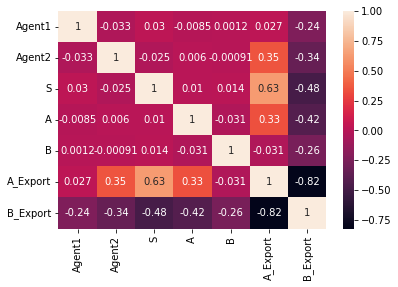

In [25]:
sns.heatmap(DF_2_A.corr(),annot=True,)

In [3]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2["A"], y=DF_2["B"],z=DF_2["A_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [4]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2["A"], y=DF_2["B"],z=DF_2["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Case 2: Mutualism

In [26]:
Toy_Model_NE_1_M=Toy_Model_NE_1.copy()
Toy_Model_NE_2_M=Toy_Model_NE_2.copy()
Models_Mutualism=[Toy_Model_NE_1_M,Toy_Model_NE_2_M]

In [27]:
Models_M=main(Models_Mutualism)

Agent 0 has been given a defult name
Agent 1 has been given a defult name
0 - Agent_0 earned 28.612469535330955 during this episode!
0 - Agent_1 earned 26.804620393724797 during this episode!
1 - Agent_0 earned 27.720618259205782 during this episode!
1 - Agent_1 earned 25.95728275867981 during this episode!
2 - Agent_0 earned 25.844356398433273 during this episode!
2 - Agent_1 earned 27.27330031581116 during this episode!
3 - Agent_0 earned 28.724528575618077 during this episode!
3 - Agent_1 earned 25.3732752421922 during this episode!
4 - Agent_0 earned 26.574187220693148 during this episode!
4 - Agent_1 earned 27.26556158412973 during this episode!
5 - Agent_0 earned 28.335714845814085 during this episode!
5 - Agent_1 earned 26.181749901179664 during this episode!
6 - Agent_0 earned 26.210544557864626 during this episode!
6 - Agent_1 earned 25.87905539936262 during this episode!
7 - Agent_0 earned 29.588083429726687 during this episode!
7 - Agent_1 earned 26.05141266297225 during thi

69 - Agent_0 earned 29.085647279394635 during this episode!
69 - Agent_1 earned 29.009617275804832 during this episode!
70 - Agent_0 earned 29.160868836940672 during this episode!
70 - Agent_1 earned 28.696587184268 during this episode!
71 - Agent_0 earned 29.04572407075005 during this episode!
71 - Agent_1 earned 29.122431176489734 during this episode!
72 - Agent_0 earned 29.090653189374517 during this episode!
72 - Agent_1 earned 29.095211278424777 during this episode!
73 - Agent_0 earned 28.83057909905828 during this episode!
73 - Agent_1 earned 29.01878775279728 during this episode!
74 - Agent_0 earned 29.15288923125215 during this episode!
74 - Agent_1 earned 28.80739198195844 during this episode!
75 - Agent_0 earned 29.199608047478836 during this episode!
75 - Agent_1 earned 28.903442780307635 during this episode!
76 - Agent_0 earned 28.668348732665198 during this episode!
76 - Agent_1 earned 29.181814784257902 during this episode!
77 - Agent_0 earned 29.233692132263972 during th

138 - Agent_0 earned 29.21504801160359 during this episode!
138 - Agent_1 earned 29.103361657548234 during this episode!
139 - Agent_0 earned 29.186853922562545 during this episode!
139 - Agent_1 earned 29.14879556387509 during this episode!
140 - Agent_0 earned 29.45429186860486 during this episode!
140 - Agent_1 earned 29.10204562662094 during this episode!
141 - Agent_0 earned 29.18490781017017 during this episode!
141 - Agent_1 earned 29.140168664218724 during this episode!
142 - Agent_0 earned 29.197614179140505 during this episode!
142 - Agent_1 earned 29.124855985375987 during this episode!
143 - Agent_0 earned 29.15456497713626 during this episode!
143 - Agent_1 earned 29.15225189383461 during this episode!
144 - Agent_0 earned 28.8956091610101 during this episode!
144 - Agent_1 earned 29.297326553160662 during this episode!
145 - Agent_0 earned 29.121246377902064 during this episode!
145 - Agent_1 earned 29.03468125138923 during this episode!
146 - Agent_0 earned 29.0762375641

206 - Agent_0 earned 29.15336132659505 during this episode!
206 - Agent_1 earned 29.56752483262968 during this episode!
207 - Agent_0 earned 29.48587097263478 during this episode!
207 - Agent_1 earned 29.04691927395341 during this episode!
208 - Agent_0 earned 29.177779695584345 during this episode!
208 - Agent_1 earned 29.15105659408557 during this episode!
209 - Agent_0 earned 29.155912881639647 during this episode!
209 - Agent_1 earned 29.15329347790801 during this episode!
210 - Agent_0 earned 29.15422692367353 during this episode!
210 - Agent_1 earned 29.14661610701414 during this episode!
211 - Agent_0 earned 29.15591882975012 during this episode!
211 - Agent_1 earned 29.153313436985705 during this episode!
212 - Agent_0 earned 29.0241821838566 during this episode!
212 - Agent_1 earned 29.047131817059753 during this episode!
213 - Agent_0 earned 28.941761362802747 during this episode!
213 - Agent_1 earned 29.63418757474895 during this episode!
214 - Agent_0 earned 29.153861382502

274 - Agent_0 earned 29.18920760557364 during this episode!
274 - Agent_1 earned 29.12740753290583 during this episode!
275 - Agent_0 earned 29.07601675606338 during this episode!
275 - Agent_1 earned 29.14538757314621 during this episode!
276 - Agent_0 earned 29.12324999784045 during this episode!
276 - Agent_1 earned 29.137954961417044 during this episode!
277 - Agent_0 earned 29.1523896788956 during this episode!
277 - Agent_1 earned 29.165297147200427 during this episode!
278 - Agent_0 earned 29.24138265273149 during this episode!
278 - Agent_1 earned 29.02959864362443 during this episode!
279 - Agent_0 earned 29.19313721249645 during this episode!
279 - Agent_1 earned 29.084742314309644 during this episode!
280 - Agent_0 earned 29.004830854284087 during this episode!
280 - Agent_1 earned 29.249485094222393 during this episode!
281 - Agent_0 earned 29.156705153026156 during this episode!
281 - Agent_1 earned 29.153649324702165 during this episode!
282 - Agent_0 earned 29.1567169220

In [17]:
#or load a pre-trained model

with open(os.path.join("Outputs","31_08_2022.08_12_03","Models.pkl"),'rb') as f:
        Models_M=pickle.load(f)

In [28]:
Space_Size=1000
Space=np.random.uniform(low=[0,0,0,0,0],high=[1,1,1,1,1],size=(Space_Size,5))
Actions_1=Models_M[0].policy(torch.FloatTensor(Space))
Actions_2=Models_M[1].policy(torch.FloatTensor(Space))

In [29]:

DF_1_M=pd.DataFrame(np.hstack((Space,Actions_1.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])

DF_2_M=pd.DataFrame(np.hstack((Space,Actions_2.detach().numpy())),columns=["Agent1","Agent2","S","A","B","A_Export","B_Export"])

<AxesSubplot:>

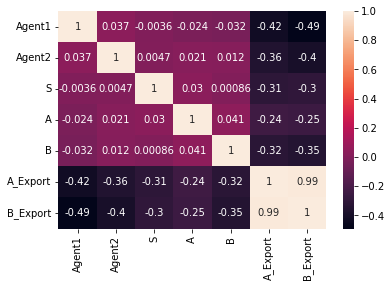

In [31]:
sns.heatmap(DF_1_M.corr(),annot=True,)

In [6]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1["A"], y=DF_1["B"],z=DF_1["A_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [5]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_1["A"], y=DF_1["B"],z=DF_1["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_1["B_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Agent 2 Policy

<AxesSubplot:>

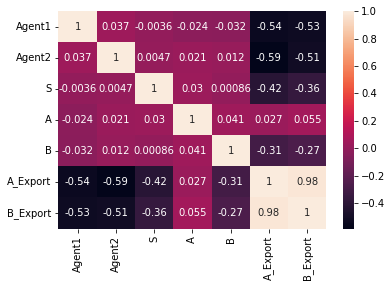

In [32]:
sns.heatmap(DF_2_M.corr(),annot=True,)

In [33]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2["S"], y=DF_2["B"],z=DF_2["A_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="A Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='A Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [34]:
# fig = go.Figure(data=[go.Scatter3d(x=DF_2["A"], y=DF_2["B"],z=DF_2["B_Export"],mode='markers',
#                                        marker=dict(
#         size=5,
#         color=DF_2["A_Export"],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=1,
#         colorbar=dict(thickness=10,title="B Export")),
# )])
# fig.update_layout(scene = dict(
#                     xaxis_title='A[C]',
#                     yaxis_title='B[C]',
#                     zaxis_title='B Export'),
#                     width=600,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

## Run a simulation with the trained models

In [46]:
def main_t(Models: list = [Toy_Model_NE_1.copy(), Toy_Model_NE_2.copy()], max_time: int = 100, Dil_Rate: float = 0.000000001, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """


    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.ones((len(Models)+len(Mapping_Dict["Ex_sp"]),))
    Inlet_C = np.zeros((len(Models)+len(Mapping_Dict["Ex_sp"]),))

    #Parameters that are use inside DFBA

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Inlet_C": Inlet_C,
        "Agents_Index": [i for i in range(len(Models))],
    }

    #Define Agent attributes

    ### I Assume that the environment states are all observable. Env states will be stochastic
    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.1,0.100001],[0.1,0.100001],[100,100.001],[0.01,0.01+0.000001],[0.01,0.01+0.00001]]

    Sol,t=Generate_Batch_t(dFBA, Params, Init_C, Models, Mapping_Dict)
    return Sol,t
    


def dFBA_t(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################

    
    sol, t = odeFwdEuler(ODE_System_t, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    return sol,t





def ODE_System_t(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        


        M.a=M.policy(torch.FloatTensor([C[M.observables]])).detach().numpy()[0]
#         M.a=np.random.uniform(low=-1, high=1,size=len(M.actions))
        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=10
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):
            M.a[index]=Flux_Clipper(M.reactions[flux].lower_bound,M.a[index],M.reactions[flux].upper_bound)
            M.reactions[flux].lower_bound=M.a[index]
            M.reactions[flux].upper_bound=M.a[index]

        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value



    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i] = 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                                    [i, j]]*C[j]


    
    
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    
    return dCdt






def Generate_Batch_t(dFBA, Params, Init_C, Models, Mapping_Dict,t_span=[0, 100], dt=1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]
    

    Sol,t=dFBA_t(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
        # Batch_Episodes.append(dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt))

    return Sol,t  


Solution_t=main_t(Models_A)



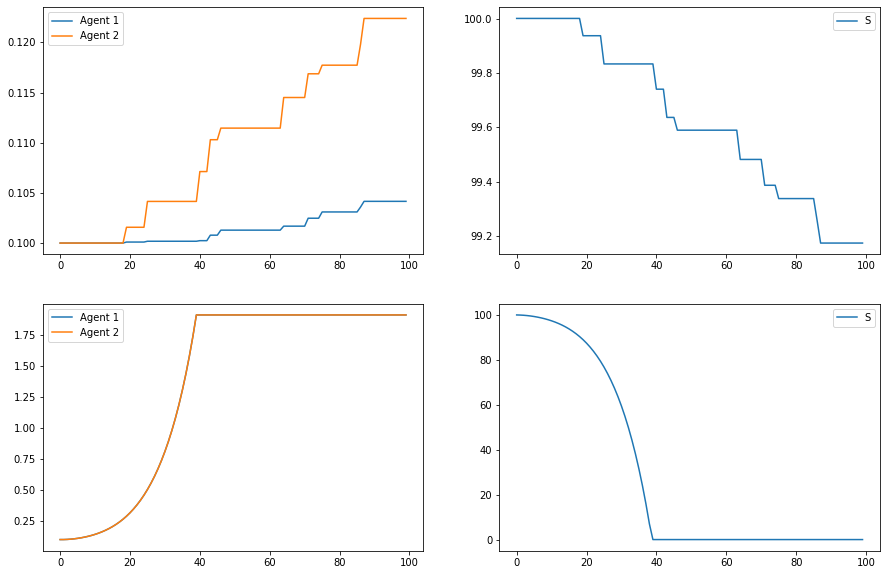

In [56]:
fig,ax=plt.subplots(2,2)
ax[0,0].plot(Solution_R[0][:,[0,1]])
ax[0,0].legend(["Agent 1","Agent 2"])
ax[0,1].plot(Solution_R[0][:,[2]])
ax[0,1].legend(["S"])
ax[1,0].plot(Solution_t[0][:,[0,1]])
ax[1,0].legend(["Agent 1","Agent 2"])
ax[1,1].plot(Solution_t[0][:,[2]])
ax[1,1].legend(["S"])
fig.set_figwidth(15)
fig.set_figheight(10)
fig.savefig("Auxotrophy.jpg")


In [49]:
Solution_t

(array([[1.00000789e-01, 1.00000194e-01, 1.00000370e+02, 1.00009820e-02,
         1.00056982e-02, 1.00000000e+00],
        [1.00100749e-01, 1.00100201e-01, 9.99473694e+01, 1.09001570e-01,
         1.09006416e-01, 9.85666800e-01],
        [1.01185949e-01, 1.01185442e-01, 9.98561241e+01, 1.98249776e-01,
         1.98254750e-01, 1.00294360e+00],
        [1.03172268e-01, 1.03171801e-01, 9.97164573e+01, 2.79572019e-01,
         2.79577107e-01, 1.06191087e+00],
        [1.06016912e-01, 1.06016483e-01, 9.95303512e+01, 3.54297381e-01,
         3.54302554e-01, 1.16027114e+00],
        [1.09707682e-01, 1.09707291e-01, 9.92981701e+01, 4.23406166e-01,
         4.23411386e-01, 1.29716905e+00],
        [1.14256473e-01, 1.14256121e-01, 9.90189976e+01, 4.87625541e-01,
         4.87630764e-01, 1.47287773e+00],
        [1.19695305e-01, 1.19694993e-01, 9.86908400e+01, 5.47493345e-01,
         5.47498517e-01, 1.68860538e+00],
        [1.26073930e-01, 1.26073661e-01, 9.83107470e+01, 6.03402085e-01,
       

In [76]:
DF_1_A['Agent']='Model_1'
DF_1_A['Case']="Auxotrophy"
DF_2_A['Agent']='Model_2'
DF_2_A['Case']="Auxotrophy"
Auxotrophy_DF=pd.concat([DF_1_A[["A_Export","B_Export","Agent","Case"]],DF_2_A[["A_Export","B_Export","Agent","Case"]]])


In [77]:
DF_1_M['Agent']='Model_1'
DF_1_M['Case']="Mutualism"
DF_2_M['Agent']='Model_2'
DF_2_M['Case']="Mutualism"
Mutualism_DF=pd.concat([DF_1_M[["A_Export","B_Export","Agent","Case"]],DF_2_M[["A_Export","B_Export","Agent","Case"]]])

In [78]:
Final_DF=pd.concat([Auxotrophy_DF,Mutualism_DF])

In [79]:
import plotly.express as px

In [95]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['A_Export'],
    x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['Case'],
    name='A_Export: Agent_1',
    marker_color='#3D9970'
))

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['B_Export'],
    x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_1')]['Case'],
    name='B_Export: Agent_1',
    marker_color='#FF4136'
))

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['A_Export'],
    x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['Case'],
    name='A_Export: Agent_1',
    marker_color='#3D9970'
))

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['B_Export'],
    x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['Case'],
    name='B_Export: Agent_1',
    marker_color='#FF4136'
))

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['A_Export'],
    x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['Case'],
    name='A_Export: Agent_2',
    marker_color='#3461eb'
))


fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['B_Export'],
    x=Final_DF[(Final_DF['Case']=='Mutualism')&(Final_DF['Agent']=='Model_2')]['Case'],
    name='B_Export: Agent_2',
    marker_color='#eb6734'
))

fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['A_Export'],
    x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['Case'],
    name='A_Export: Agent_2',
    marker_color='#3461eb'
))


fig.add_trace(go.Box(
    y=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['B_Export'],
    x=Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_2')]['Case'],
    name='B_Export: Agent_2',
    marker_color='#eb6734'
))


# fig.add_trace(go.Box(
#     y=[0.6, 0.7, 0.3, 0.6, 0.0, 0.5, 0.7, 0.9, 0.5, 0.8, 0.7, 0.2],
#     x=x,
#     name='radishes',
#     marker_color='#FF4136'
# ))
# fig.add_trace(go.Box(
#     y=[0.1, 0.3, 0.1, 0.9, 0.6, 0.6, 0.9, 1.0, 0.3, 0.6, 0.8, 0.5],
#     x=x,
#     name='carrots',
#     marker_color='#FF851B'
# ))

fig.update_layout(
    yaxis_title='Policy Distribution',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()

In [75]:
Final_DF[(Final_DF['Case']=='Auxotrophy')&(Final_DF['Agent']=='Model_1')]['A_Export']

Series([], Name: A_Export, dtype: float64)

## Case 3: Starch Amylase case

In [8]:
from cmath import tanh
import datetime

import numpy as np
import cobra
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
import pickle
import pandas
#import cplex
import torch
from ToyModel import ToyModel_SA
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple,deque
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import warnings
import torch.autograd
from torch.autograd import Variable
import gym
from tensorboardX import SummaryWriter

Scaler=StandardScaler()

NUMBER_OF_BATCHES=300
warnings.filterwarnings("ignore")
Scaler=StandardScaler()
HIDDEN_SIZE=20
Main_dir = os.path.dirname(".")

Episode = namedtuple('Episode', field_names=['reward', 'steps'])
EpisodeStep = namedtuple('EpisodeStep', field_names=['observation', 'action'])

        
class Memory:
    def __init__(self, max_size):
        self.buffer = deque(maxlen=max_size)
    
    def push(self, state, action, reward, next_state):
        experience = (state, action, np.array([reward]), next_state)
        self.buffer.appendleft(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
       

        batch = random.sample(self.buffer, batch_size)

        for experience in batch:
            state, action, reward, next_state = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            
        
        return state_batch, action_batch, reward_batch, next_state_batch

    def __len__(self):
        return len(self.buffer)



class DDPGActor(nn.Module):

    def __init__(self, obs_size, act_size):
        super(DDPGActor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_size, 400),nn.Tanh(),
            nn.Linear(400,400),nn.Tanh(),
            nn.Linear(400, act_size),
            
             )

    def forward(self, x):
       return self.net(x)

class DDPGCritic(nn.Module):       
    
    def __init__(self, obs_size, act_size):

        super(DDPGCritic, self).__init__()
        self.obs_net = nn.Sequential(
            nn.Linear(obs_size, 300),nn.Tanh(),
            nn.Linear(300,300),nn.Tanh(),   
            nn.Linear(300,300),nn.Tanh(),
            nn.Linear(300,20)
            
            )


        self.out_net = nn.Sequential(
                       nn.Linear(20 + act_size, 300),nn.Tanh(),
                       nn.Linear(300,300),nn.Tanh(),
                       nn.Linear(300, 1)
                       )
    
    def forward(self, x, a):
        obs = self.obs_net(x)           
        return self.out_net(torch.cat([obs, a],dim=1))

def main(Models: list = [ToyModel_SA.copy(), ToyModel_SA.copy()], max_time: int = 100, Dil_Rate: float = 0.1, alpha: float = 0.01, Starting_Q: str = "FBA"):
    """
    This is the main function for running dFBA.
    The main requrement for working properly is
    that the models use the same notation for the
    same reactions.

    Starting_Policy:

    Defult --> Random: Initial Policy will be a random policy for all agents.
    Otherwise --> a list of policies, pickle file addresses, for each agent.


    """
    # Adding Agents info ###-----------------------------------------------------

    # State dimensions in this RLDFBA variant include: [Agent1,...,Agentn, glucose,starch]
    Number_of_Models = Models.__len__()
    for i in range(Number_of_Models):
        if not hasattr(Models[i], "_name"):
            Models[i].NAME = "Agent_" + str(i)
            print(f"Agent {i} has been given a defult name")
        Models[i].solver.objective.name = "_pfba_objective"
    # -------------------------------------------------------------------------------

    # Mapping internal reactions to external reactions, and operational parameter
    # setup ###-------------------------------------------------------------------

    # For more information about the structure of the ODEs,see ODE_System function
    # or the documentation.

    Mapping_Dict = Build_Mapping_Matrix(Models)
    Init_C = np.zeros((Models.__len__()+Mapping_Dict["Ex_sp"].__len__()+1,))
    Inlet_C = np.zeros((Models.__len__()+Mapping_Dict["Ex_sp"].__len__()+1,))

    # The Params are the main part to change from problem to problem

    Params = {
        "Dilution_Rate": Dil_Rate,
        "Glucose_Index": Mapping_Dict["Ex_sp"].index("Glc")+Models.__len__(),
        "Starch_Index": Mapping_Dict["Ex_sp"].__len__()+Models.__len__(),
        "Amylase_Ind": Mapping_Dict["Ex_sp"].index("Amylase")+Models.__len__(),
        "Inlet_C": Inlet_C,
        "Model_Glc_Conc_Index": [Models[i].reactions.index("Glc_Ex") for i in range(Number_of_Models)],
        "Model_Amylase_Conc_Index": [Models[i].reactions.index("Amylase_Ex") for i in range(Number_of_Models)],
        "Agents_Index": [i for i in range(Number_of_Models)],
    }

    Obs=[i for i in range(len(Models))]
    Obs.extend([Params["Glucose_Index"],Params["Starch_Index"]])
    for ind,m in enumerate(Models):
        m.observables=Obs
        m.actions=(Models[i].reactions.index("Amylase_Ex"),)
        m.policy=DDPGActor(len(m.observables),len(m.actions))
        m.policy_target=DDPGActor(len(m.observables),len(m.actions))
        m.value=DDPGCritic(len(m.observables),len(m.actions))
        m.value_target=DDPGCritic(len(m.observables),len(m.actions))
        m.R=0
        m.tau=0.005
        m.optimizer_policy=optim.Adam(params=m.policy.parameters(), lr=0.001)
        m.optimizer_policy_target=optim.Adam(params=m.policy.parameters(), lr=0.01)
        m.optimizer_value=optim.Adam(params=m.value.parameters(), lr=0.001)
        m.optimizer_value_target=optim.Adam(params=m.value.parameters(), lr=0.01)
        m.Net_Obj=nn.MSELoss()
        m.buffer=Memory(10000)
        m.alpha=0.01
        m.update_batch=500
        m.gamma=1
    
    Inlet_C[Params["Starch_Index"]] = 10
    Params["Inlet_C"] = Inlet_C
    
    for i in range(Number_of_Models):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA")
    Outer_Counter = 0


    Params["Env_States"]=Models[0].observables
    Params["Env_States_Initial_Ranges"]=[[0.1,0.1+0.00000001],[100,100+0.00001],[10,10+0.00000000001]]
    Params["Env_States_Initial_MAX"]=np.array([10,500,10])
    for i in range(len(Models)):
        Init_C[i] = 0.001
        #Models[i].solver = "cplex"
    writer = SummaryWriter(comment="-DeepRLDFBA_NECOM")
    Outer_Counter = 0


    

    Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer)
    Time=datetime.datetime.now().strftime("%d_%m_%Y.%H_%M_%S")
    Results_Dir=os.path.join(Main_dir,"Outputs",str(Time))
    os.mkdir(Results_Dir)
    with open(os.path.join(Results_Dir,"Models.pkl"),'wb') as f:
        pickle.dump(Models,f)
    return Models

    


def dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=0.1):
    """
    This function calculates the concentration of each species
    Models is a list of COBRA Model objects
    Mapping_Dict is a dictionary of dictionaries
    """
    ##############################################################
    # Initializing the ODE Solver
    ##############################################################
    t = np.arange(t_span[0], t_span[1], dt)
    ##############################################################
    # Solving the ODE
    ##############################################################
    for m in Models:
        m.episode_reward=0
        m.episode_steps=[]

    
    sol, t = odeFwdEuler(ODE_System, Init_C, dt,  Params,
                         t_span, Models, Mapping_Dict)
    
    for m in Models:
        m.Episode=Episode(reward=m.episode_reward, steps=m.episode_steps)




    return [m.Episode for m in Models]


def ODE_System(C, t, Models, Mapping_Dict, Params, dt,Counter):
    """
    This function calculates the differential equations for the system
    Models is a list of COBRA Model objects
    NOTE: this implementation of DFBA is compatible with RL framework
    Given a policy it will genrate episodes. Policies can be either deterministic or stochastic
    Differential Equations Are Formatted as follows:
    [0]-Models[1]
    [1]-Models[2]
    []-...
    [n-1]-Models[n]
    [n]-Exc[1]
    [n+1]-Exc[2]
    []-...
    [n+m-1]-Exc[m]
    [n+m]-Starch
    """
    C[C < 0] = 0
    dCdt = np.zeros(C.shape)
    Sols = list([0 for i in range(Models.__len__())])
    for i,M in enumerate(Models):
        M.a=M.policy(torch.FloatTensor([C[M.observables]/Params["Env_States_Initial_MAX"]])).detach().numpy()[0]
        if random.random()<M.epsilon:
            
            # M.a=M.policy(torch.FloatTensor([C[M.observables]])).detach().numpy()[0]
            # M.rand_act=np.random.uniform(low=-1, high=1,size=len(M.actions)).copy()
            # M.a+=M.rand_act
            # M.a+=np.random.uniform(low=-1, high=1,size=len(M.actions))
            M.a=np.random.uniform(low=0, high=5,size=len(M.actions))

        else:
            pass

        for index,item in enumerate(Mapping_Dict["Ex_sp"]):
            if Mapping_Dict['Mapping_Matrix'][index,i]!=-1:
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].upper_bound=100
                M.reactions[Mapping_Dict['Mapping_Matrix'][index,i]].lower_bound=-General_Uptake_Kinetics(C[index+len(Models)])
                
            
        for index,flux in enumerate(M.actions):

            if M.a[index]<0:
            
                M.reactions[M.actions[index]].lower_bound=min(M.a[index],M.reactions[M.actions[index]].lower_bound)

            else:

                M.reactions[M.actions[index]].lower_bound=M.a[index]

        
        
        Sols[i] = Models[i].optimize()

        if Sols[i].status == 'infeasible':
            Models[i].reward=-10
            dCdt[i] = 0

        else:
            dCdt[i] += Sols[i].objective_value*C[i]
            Models[i].reward =Sols[i].objective_value




    ### Writing the balance equations

    for i in range(Mapping_Dict["Mapping_Matrix"].shape[0]):
        for j in range(len(Models)):
            if Mapping_Dict["Mapping_Matrix"][i, j] != -1:
                if Sols[j].status == 'infeasible':
                    dCdt[i+len(Models)] = 0
                else:
                    dCdt[i+len(Models)] += Sols[j].fluxes.iloc[Mapping_Dict["Mapping_Matrix"]
                                                 [i, j]]*C[j]
    dCdt[Params["Glucose_Index"]] += Starch_Degradation_Kinetics(
                        C[Params["Amylase_Ind"]], C[Params["Starch_Index"]])*10

    dCdt[Params["Starch_Index"]] = - \
        Starch_Degradation_Kinetics(
            C[Params["Amylase_Ind"]], C[Params["Starch_Index"]])/100
            
    dCdt += np.array(Params["Dilution_Rate"])*(Params["Inlet_C"]-C)
    Next_C=C+dCdt*dt
    for m in Models:
        m.buffer.push(torch.FloatTensor([C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0],m.a,m.reward,torch.FloatTensor([Next_C[m.observables]/Params["Env_States_Initial_MAX"]]).detach().numpy()[0])
        if Counter>0 and Counter%m.update_batch==0:
            # TD_Error=[]
            S,A,R,Sp=m.buffer.sample(500)
            
            
            Qvals = m.value(torch.FloatTensor(S), torch.FloatTensor(A))
            next_actions = m.policy_target(torch.FloatTensor(Sp)).detach()
            next_Q = m.value_target(torch.FloatTensor(Sp), next_actions)
            # Qprime = torch.FloatTensor(R) + next_Q-m.R
            Qprime = torch.FloatTensor(R) +m.gamma*next_Q
            critic_loss=m.Net_Obj(Qvals,Qprime.detach())
            
            
            
            
            m.optimizer_value.zero_grad()
            critic_loss.backward()
            m.optimizer_value.step()
            
            policy_loss = -m.value(torch.FloatTensor(S), m.policy(torch.FloatTensor(S))).mean()
            # m.R=m.alpha*torch.mean(Qvals-Qprime+torch.FloatTensor(R)-m.R).detach().numpy()
            m.optimizer_policy.zero_grad()
            policy_loss.backward()
            m.optimizer_policy.step()
            
        
        for target_param, param in zip(m.policy_target.parameters(), m.policy.parameters()):
            target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau))
    
        for target_param, param in zip(m.value_target.parameters(), m.value.parameters()):
            target_param.data.copy_(param.data * m.tau + target_param.data * (1-m.tau ))
        
        
        
        
        
        
        
        
        
        
        
        m.episode_reward+=m.reward

    
    return dCdt


def Build_Mapping_Matrix(Models):
    """
    Given a list of COBRA model objects, this function will build a mapping matrix

    """

    Ex_sp = []
    Temp_Map={}
    for model in Models:
        
        
        if not hasattr(model,"Biomass_Ind"):
            raise Exception("Models must have 'Biomass_Ind' attribute in order for the DFBA to work properly!")
        
        
        for Ex_rxn in model.exchanges :
            if Ex_rxn!=model.reactions[model.Biomass_Ind]:
                if list(Ex_rxn.metabolites.keys())[0].id not in Ex_sp:
                    Ex_sp.append(list(Ex_rxn.metabolites.keys())[0].id)
                if list(Ex_rxn.metabolites.keys())[0].id in Temp_Map.keys():
                   Temp_Map[list(Ex_rxn.metabolites.keys())[0].id][model]=Ex_rxn
                else:
                     Temp_Map[list(Ex_rxn.metabolites.keys())[0].id]={model:Ex_rxn}

    Mapping_Matrix = np.zeros((len(Ex_sp), len(Models)), dtype=int)
    for i, id in enumerate(Ex_sp):
        for j, model in enumerate(Models):
            if model in Temp_Map[id].keys():
                Mapping_Matrix[i, j] = model.reactions.index(Temp_Map[id][model].id)
            else:
                Mapping_Matrix[i, j] = -1
    return {"Ex_sp": Ex_sp, "Mapping_Matrix": Mapping_Matrix}


def Starch_Degradation_Kinetics(a_Amylase: float, Starch: float, Model="", k: float =1):
    """
    This function calculates the rate of degradation of starch
    a_Amylase Unit: mmol
    Starch Unit: mg

    """

    return a_Amylase*Starch*k/(Starch+10)


def Glucose_Uptake_Kinetics(Glucose: float, Model=""):
    """
    This function calculates the rate of glucose uptake
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Glucose Unit: mmol

    """
    return 20*(Glucose/(Glucose+20))


def General_Uptake_Kinetics(Compound: float, Model=""):
    """
    This function calculates the rate of uptake of a compound in the reactor
    ###It is just a simple imaginary model: Replace it with better model if necessary###
    Compound Unit: mmol

    """
    return 20*(Compound/(Compound+20))





def odeFwdEuler(ODE_Function, ICs, dt, Params, t_span, Models, Mapping_Dict):
    Integrator_Counter = 0
    t = np.arange(t_span[0], t_span[1], dt)
    sol = np.zeros((len(t), len(ICs)))
    sol[0] = ICs
    for i in range(1, len(t)):
        sol[i] = sol[i-1] + \
            ODE_Function(sol[i-1], t[i-1], Models, Mapping_Dict,
                         Params, dt,Integrator_Counter)*dt
        Integrator_Counter += 1
    return sol, t


def Generate_Batch(dFBA, Params, Init_C, Models, Mapping_Dict,writer,t_span=[0, 100], dt=0.1):


    Init_C[list(Params["Env_States"])] = [random.uniform(Range[0], Range[1]) for Range in Params["Env_States_Initial_Ranges"]]

    
    for BATCH in range(NUMBER_OF_BATCHES):
        for model in Models:
            model.epsilon=0.001+0.9/(np.exp(BATCH/20))
            model.tau=0.1/(np.exp(BATCH/20))
        dFBA(Models, Mapping_Dict, Init_C, Params, t_span, dt=dt)
    
        for mod in Models:
            print(f"{BATCH} - {mod.NAME} earned {mod.episode_reward} during this episode!")
            writer.add_scalar(f"{mod.NAME} reward_mean", mod.episode_reward, BATCH)
    





def Flux_Clipper(Min,Number,Max):
    return(min(max(Min,Number),Max))

if __name__=='__main__':
    Models_S=main([ToyModel_SA.copy()])

Agent 0 has been given a defult name
0 - Agent_0 earned -2893.5250893559355 during this episode!
1 - Agent_0 earned -2893.4305832694354 during this episode!
2 - Agent_0 earned -2892.129537869002 during this episode!
3 - Agent_0 earned -2871.330632157792 during this episode!
4 - Agent_0 earned -2871.1323459245787 during this episode!
5 - Agent_0 earned -2831.9392770828995 during this episode!
6 - Agent_0 earned -2841.0988552632307 during this episode!
7 - Agent_0 earned -2900.4383327668893 during this episode!
8 - Agent_0 earned -2710.5628205548937 during this episode!
9 - Agent_0 earned -2789.4347970233403 during this episode!
10 - Agent_0 earned -2709.851820811823 during this episode!
11 - Agent_0 earned -2710.503190979406 during this episode!
12 - Agent_0 earned -2750.6804995584707 during this episode!
13 - Agent_0 earned -2668.5334363270445 during this episode!
14 - Agent_0 earned -2679.1852580970326 during this episode!
15 - Agent_0 earned -2491.160552734256 during this episode!
16

136 - Agent_0 earned 138.5887893736772 during this episode!
137 - Agent_0 earned 128.01010512603995 during this episode!
138 - Agent_0 earned 137.9180304776743 during this episode!
139 - Agent_0 earned 128.053976878698 during this episode!
140 - Agent_0 earned 137.75955127478613 during this episode!
141 - Agent_0 earned 138.53774710610858 during this episode!
142 - Agent_0 earned 138.02964154964965 during this episode!
143 - Agent_0 earned 128.20617383432045 during this episode!
144 - Agent_0 earned 138.68233430362739 during this episode!
145 - Agent_0 earned 128.0996684459196 during this episode!
146 - Agent_0 earned 138.606332859747 during this episode!
147 - Agent_0 earned 138.12899781082686 during this episode!
148 - Agent_0 earned 128.16182123595632 during this episode!
149 - Agent_0 earned 138.54819056795222 during this episode!
150 - Agent_0 earned 138.19652426240938 during this episode!
151 - Agent_0 earned 118.1570761146588 during this episode!
152 - Agent_0 earned 128.2460021

272 - Agent_0 earned 130.84499124812908 during this episode!
273 - Agent_0 earned 140.6802668377175 during this episode!
274 - Agent_0 earned 130.8451573258158 during this episode!
275 - Agent_0 earned 138.61368999885246 during this episode!
276 - Agent_0 earned 140.8177631291887 during this episode!
277 - Agent_0 earned 140.8892165256366 during this episode!
278 - Agent_0 earned 120.91249911025703 during this episode!
279 - Agent_0 earned 120.89372028958289 during this episode!
280 - Agent_0 earned 130.93468813962474 during this episode!
281 - Agent_0 earned 140.94586451610698 during this episode!
282 - Agent_0 earned 130.82465533765316 during this episode!
283 - Agent_0 earned 140.97228888077066 during this episode!
284 - Agent_0 earned 140.32710608600067 during this episode!
285 - Agent_0 earned 140.99739461607328 during this episode!
286 - Agent_0 earned 131.00840990665017 during this episode!
287 - Agent_0 earned 141.01650686085847 during this episode!
288 - Agent_0 earned 131.036

In [9]:
import pandas as pd
Space_Size=10000
Space=np.random.uniform(low=[0,0,0],high=[5,5,5],size=(Space_Size,3))
Actions=Models_S[0].policy(torch.FloatTensor(Space))*10

DF_S=pd.DataFrame(np.hstack((Space,Actions.detach().numpy())),columns=["Agent","Glucose","Starch","Amylase_Production"])

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:


fig = go.Figure(data=[go.Scatter3d(x=DF_S["Glucose"], y=DF_S["Starch"],z=DF_S["Amylase_Production"],mode='markers',
                                        marker=dict(
        size=2,
        color=DF_S["Amylase_Production"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1,
        colorbar=dict(thickness=10,title="Amylase_Production")),
                                  )])
fig.update_layout(scene = dict(
                    xaxis_title='Glucose[C]',
                    yaxis_title='Starch[C]',
                    zaxis_title='Amylase Export'),
                    width=600,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<AxesSubplot:>

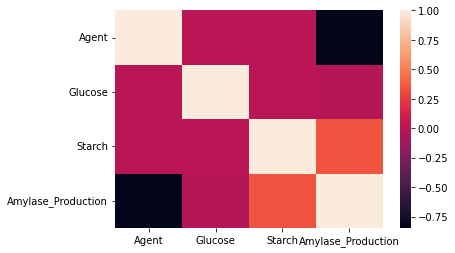

In [12]:
sns.heatmap(DF_S.corr())